# Telco Customer Churn - Focused Customer retention 

## 2.0 Logistic Regression Analysis (Section 2)

In [1]:
import pandas as pd # imported to load and manipulate the dataset
import numpy as np # imported for additional maths and/or stats functions
import matplotlib.pyplot as plt # imported for data visualisation functions
import seaborn as sns #imported for additional data visualisation functions
from sklearn.model_selection import train_test_split # library imported to split data into testing and training for logistic regression analysis 
from sklearn.linear_model import LogisticRegression # library imported for logistic regression analysis 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # library imported to test performance of ML methods
from sklearn.preprocessing import StandardScaler # library imported to scale features for ML method
import warnings
warnings.filterwarnings("ignore") #suppresses warnings in the notebook. 
# warnings.resetwarnings() #commented line can be run to re-enable warnings.
#%pdb #enable or disable automatic activation of the debugger when exceptions occur.

### 2.1 Data Preprocessing & Encoding

In [2]:
# Directory created for Jupyter Notebook for our Logistic regression analysis.
# Notebook runs from same space all other paths are relative to 
# datafile addressed from the same space.

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(file_path)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') 
data_cleaned = data.dropna(subset=['TotalCharges']) #cleansed data from Section used for Logistic Regression Analysis (no outliers detected through IQR method)

# Converting variables into dummy variables and setting 'Churn' to target variable 
X = pd.get_dummies(data_cleaned.drop(['Churn', 'customerID'], axis=1)) #ignoring Churn & customerID column
y = data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) #converting 'Churn' column into binary format

### 2.2 Data Splitting & Model Training 

In [3]:
# Splitting dataset into training & testing sets for our Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Scaling the features for the logistic regression analysis using the Standard Scaler function
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialising the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced') #class_weight='balanced' to handle imbalance

# Training the model with the training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

### 2.3 Model Prediction & Testing

#### 2.3.1 Classification Report 

In [4]:
# Performing predictions on test data
y_pred = log_reg.predict(X_test_scaled)

# Model Evaluation metrics (accuracy, precision, recall,..)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.7388625592417062
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1549
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110


Confusion Matrix:
[[1108  441]
 [ 110  451]]


#### 2.3.2 ROC Curve

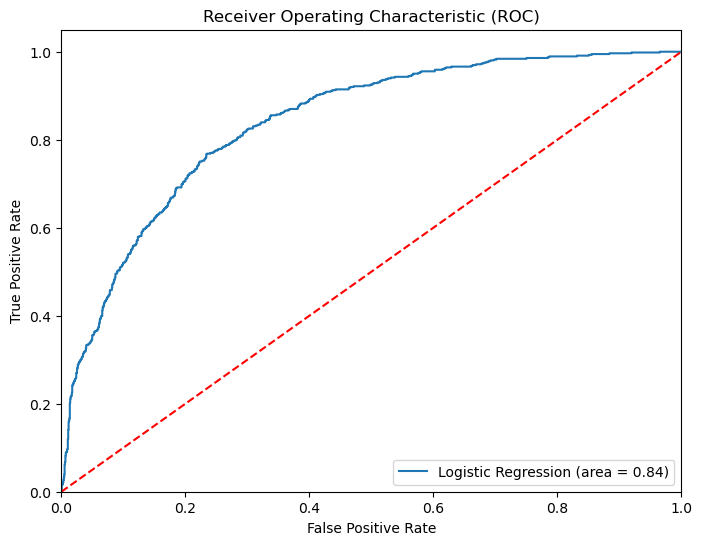

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score

# Computing predicted probabilities
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Generating ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### 2.3.3 Feature Importances

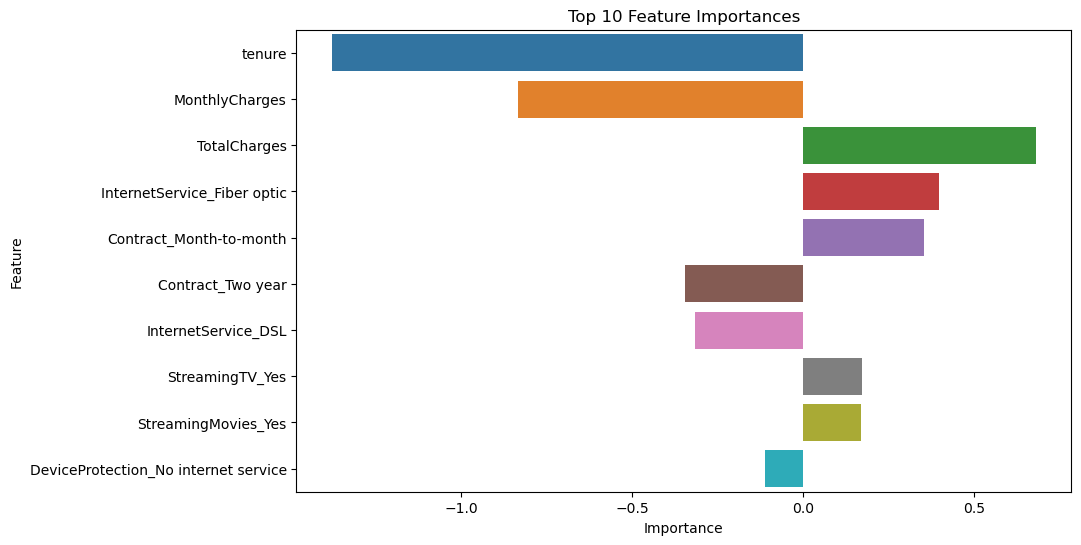

In [6]:
# Denoting feature names and coefficients
feature_names = X.columns
coefficients = log_reg.coef_.flatten()

# Creating dataFrame for features and their importance - sort by absolute importance 
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

### [additional analysis (not covered in report)] Dimensionality Reduction - PCA 

In [7]:
#importing libraries for principle-component analysis (PCA) 
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline

# Preprocessing the data, converting categorical variables into dummy variables and setting 'Churn' to target variable
X = pd.get_dummies(data_cleaned.drop(['Churn', 'customerID'], axis=1))
y = data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Converting 'Churn' column into binary format

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Defining the number of principal components
n_components = 3 

# Creating PCA object
pca = PCA(n_components=n_components)

# Initialising Logistic Regression model with class_weight='balanced'
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Creating a pipeline that scales, then applies PCA, then trains the logistic regression model
pipeline = make_pipeline(scaler, pca, log_reg)

# Training model with the training data
pipeline.fit(X_train, y_train)

# Making predictions using the test data
y_pred = pipeline.predict(X_test)

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.7157071783937455
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.78      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.72      0.73      1407


Confusion Matrix:
[[717 316]
 [ 84 290]]
